### 공공보건의료기관 현황
##### 데이터 확인

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./보건복지부_보건의료기관현황.csv', index_col=0, encoding='cp949', engine='python')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 1 to 220
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   병원 명        227 non-null    object
 1   설립형태        227 non-null    object
 2   근거 법령       227 non-null    object
 3   관계 행정기관     227 non-null    object
 4   관계 공공단체     227 non-null    object
 5   심평원 요양기관번호  227 non-null    int64 
 6   종별구분        227 non-null    object
 7   병상수         227 non-null    int64 
 8   소재지 우편번호    227 non-null    object
 9   주소          227 non-null    object
 10  홈페이지        227 non-null    object
 11  대표전화        227 non-null    object
 12  FAX         203 non-null    object
 13  비고          4 non-null      object
dtypes: int64(2), object(12)
memory usage: 26.6+ KB


##### 주소 정리하기


In [3]:
addr = pd.DataFrame(data['주소'].apply(lambda v:v.split()[:2]).tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


##### 주소체계에 맞지 않게 표현된 내용 찾아서 수정

In [4]:
addr['시도'].unique()  #유일한 값만 출력

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

1. 'sido(시도)'열 수정: 열'시'가 아닌 데이터 찾아서 수정
- 서울특별시, 부산/대구/인천/광주/대전/울산광역시, 세종특별자치시, 경기도, 강원/전북/제주특별자치도, 충청/경상북도, 충청/전라/경상남도

In [5]:
addr[addr['시도']=='창원시'] 
#->경상남도 창원시로 수정하기

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [6]:
addr[addr['시도']=='경산시'] 
#->경상북도 경산시로 수정하기

,시도,군구
47,경산시,경안로


In [7]:
addr[addr['시도']=='천안시'] 
#->충천남도 천안시로 변경

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [8]:
addr.iloc[27]
addr.iloc[31]

시도            창원시
군구    마산합포구3.15대로
Name: 31, dtype: object

In [9]:
addr[addr['시도'] == '경산시'] 

,시도,군구
47,경산시,경안로


In [10]:
addr.iloc[47] = ['경상북도', '경산시']

In [11]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [12]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '충청북도'], dtype=object)

In [13]:
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', 
                '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', 
                '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}  #주소 딕셔너리
addr['시도'] = addr['시도'].apply(lambda s: addr_aliases.get(s, s))  #딕셔너리의 value값 리턴: get(key, 디폴트값)

addr['시도'].unique()  #->주소 체계 수정 확인하기

array(['강원도', '경기도', '경상남도', '창원시', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

2. '구군'열 수정

In [14]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '의창구', '김해시', '양산시', '거창군',
       '마산합포구3.15대로', '남해군', '창원시', '의령군', '포항시', '김천시', '안동시', '울진군',
       '경주시', '구미시', '영주시', '상주시', '문경시', '경산시', '의성군', '청도군', '고령군',
       '칠곡군', '봉화군', '울릉군', '부평구', '북구', '순천시', '대덕구', '태백시', '동해시',
       '화성시', '광산구', '남구', '중구', '아란13길', '서구', '전주시', '진주시', '청주시',
       '종로구', '성남시', '동구', '화순군', '강동구', '사상구', '달서구', '해운대구', '유성구',
       '가평군', '양주시', '고양시', '홍천군', '양구군', '청원군', '계룡시', '논산시', '함평군',
       '양평군', '수성구', '달성군', '연수구', '노원구', '기장군', '공주시', '강북구', '광진구',
       '나주시', '창녕군', '목포시', '고흥군', '연제구', '동매로', '서초구', '은평구', '중랑구',
       '강남구', '동작구', '동대문구', '양천구', '성동구', '송파구', '울주군', '계양구', '옹진군',
       '보성군', '광양시', '영광군', '무안군', '진도군', '강진군', '곡성군', '여수시', '신안군',
       '장성군', '완주군', '부안군', '정읍시', '남원시', '군산시', '고창군', '진안군', '제주시',
       '서귀포시', '천

In [15]:
addr[addr['군구']=='아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [16]:
addr.iloc[75] = ['제주특별자치도', '제주시']  #수정하기

3. 행정구역별 공공보건의료기관 수 구하기

In [17]:
addr['시도군구'] = addr.apply(lambda r:r['시도']+ ' ' +r['군구'], axis=1)  #컬럼 병합
addr.head()  #열 추가 확인

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [18]:
addr['count']=0

In [19]:
addr_group = addr.groupby(['시도', '군구', '시도군구'], as_index=False).count()
addr_group.head(20)

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
5,강원도,영월군,강원도 영월군,1
6,강원도,원주시,강원도 원주시,2
7,강원도,정선군,강원도 정선군,2
8,강원도,춘천시,강원도 춘천시,5
9,강원도,태백시,강원도 태백시,1


In [20]:
addr_group = addr_group.set_index('시도군구')  #index를 '시도구군'으로 변경
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


##### 행정구역별 인구수 데이터 준비하기
1. 데이터 정리하기

In [21]:
#열 이름 확인
ppl = pd.read_csv('./행정구역_시군구_별__성별_인구수_20240518042122.csv', encoding='cp949', header=0)
ppl.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51285153,25541855,25743298
1,서울특별시,소계,9378269,4532115,4846154
2,서울특별시,종로구,139432,67138,72294
3,서울특별시,중구,121607,58737,62870
4,서울특별시,용산구,207969,99566,108403


In [22]:
#컬럼 이름 바꾸기
ppl = ppl.rename(columns={'행정구역(시군구)별(1)':'시도', 
                          '행정구역(시군구)별(2)':'군구'})
ppl

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51285153,25541855,25743298
1,서울특별시,소계,9378269,4532115,4846154
2,서울특별시,종로구,139432,67138,72294
3,서울특별시,중구,121607,58737,62870
4,서울특별시,용산구,207969,99566,108403
...,...,...,...,...,...
288,경상남도,거창군,59971,29525,30446
289,경상남도,합천군,40879,20029,20850
290,제주특별자치도,소계,672775,336674,336101
291,제주특별자치도,제주시,489780,244552,245228


In [23]:
for i in range(0, len(ppl)):
    ppl.loc[i,'시도'] = ppl.iloc[i,0].strip()
    ppl.loc[i,'군구'] = ppl.iloc[i,1].strip()

#시도, 군구 열 값들의 공백을 없애고 오른쪽 정렬
ppl['시도군구'] = ppl.apply(lambda r:r['시도']+' '+r['군구'], axis=1)
#시도+군구=시도군구 열 생성
ppl = ppl[ppl.군구 != '소계']  #군구 열 값이 '소계'인 것은 제외
ppl = ppl.set_index('시도군구')  #sido_gugun이 열 인덱스로
ppl.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139432,67138,72294
서울특별시 중구,서울특별시,중구,121607,58737,62870
서울특별시 용산구,서울특별시,용산구,207969,99566,108403
서울특별시 성동구,서울특별시,성동구,276847,134161,142686
서울특별시 광진구,서울특별시,광진구,334790,160670,174120


2. addr_group과 ppl 병합

In [24]:
addr_group

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [25]:
addr_ppl_merge = pd.merge(addr_group, ppl, how='inner', left_index=True, right_index=True)  #병합
addr_ppl_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
경기도 가평군,경기도,가평군,1,경기도,가평군,62281,32056,30225
경기도 고양시,경기도,고양시,4,경기도,고양시,1071272,522367,548905
경기도 남양주시,경기도,남양주시,5,경기도,남양주시,733209,363407,369802
경기도 동두천시,경기도,동두천시,1,경기도,동두천시,87725,43733,43992
경기도 부천시,경기도,부천시,1,경기도,부천시,775488,383075,392413


In [26]:
#필요한 컬럼만 추출
local_ppl = addr_ppl_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_ppl.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
경기도 가평군,경기도,가평군,1,62281
경기도 고양시,경기도,고양시,4,1071272
경기도 남양주시,경기도,남양주시,5,733209
경기도 동두천시,경기도,동두천시,1,87725
경기도 부천시,경기도,부천시,1,775488


In [45]:
local_ppl = local_ppl.rename(columns={'시도_x':'시도', '군구_x':'군구',
                                      '총인구수 (명)':'인구수'})  #컬럼 이름 변경
count = local_ppl['count']
local_ppl['ratio'] = count.div(local_ppl['인구수'], axis=0)*100000
#인구수 대비 공공보건의료기관 비율 구하기
local_ppl

,시도,군구,count,인구수,ratio
시도군구,,,,,
경기도 가평군,경기도,가평군,1,62281,1.605626
경기도 고양시,경기도,고양시,4,1071272,0.373388
경기도 남양주시,경기도,남양주시,5,733209,0.681934
경기도 동두천시,경기도,동두천시,1,87725,1.139926
경기도 부천시,경기도,부천시,1,775488,0.128951
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27628,3.619516
충청북도 영동군,충청북도,영동군,1,43909,2.277437
충청북도 제천시,충청북도,제천시,1,129900,0.769823


In [81]:
local_ppl.to_csv('E:/0401/빅데이터분석/week11/local.csv', encoding='cp949')

##### 분석 모델 구축 및 시각화

- 행정구역별 한 사람당 공보건의료기관 수(비율)에 대한 바 차트 그리기

In [28]:
#matplotlib 스타일
import matplotlib.pyplot as plt
from matplotlib import rcParams, style
from matplotlib import font_manager, rc

In [33]:
style.use('ggplot')
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

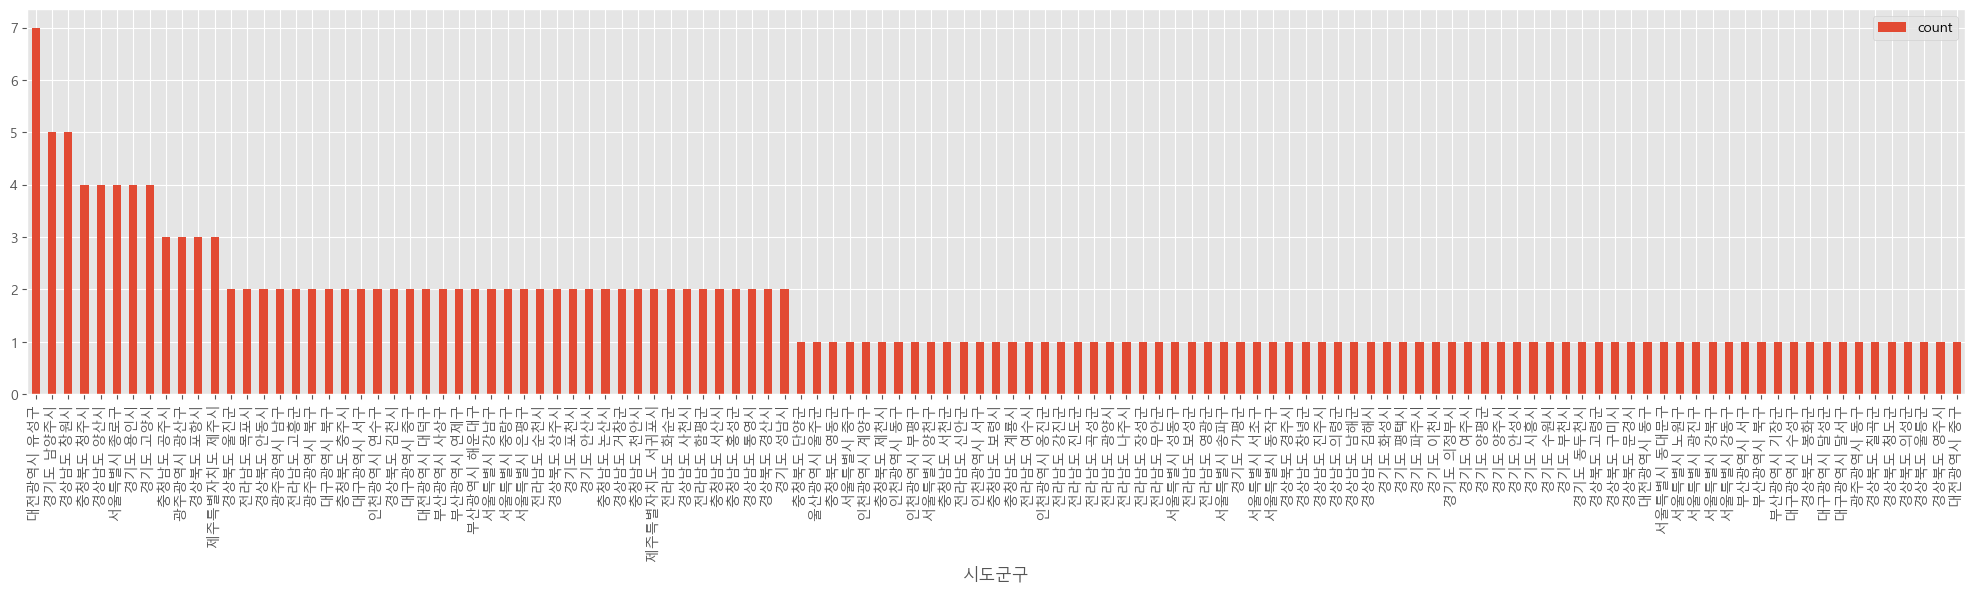

In [90]:
MC_count = local_ppl[['count']]
MC_count = MC_count.sort_values('count', ascending=False)  #'count'칼럼 기준으로 내림차순
plt.rcParams['figure.figsize']=(25,5)
MC_count.plot(kind='bar', rot=90)
plt.savefig('E:/0401/빅데이터분석/week11/count_bar.png')
plt.show()

- 행정구역별 인구수 대비 공공보건의료기간 비율에 대한 바 차트 그리기

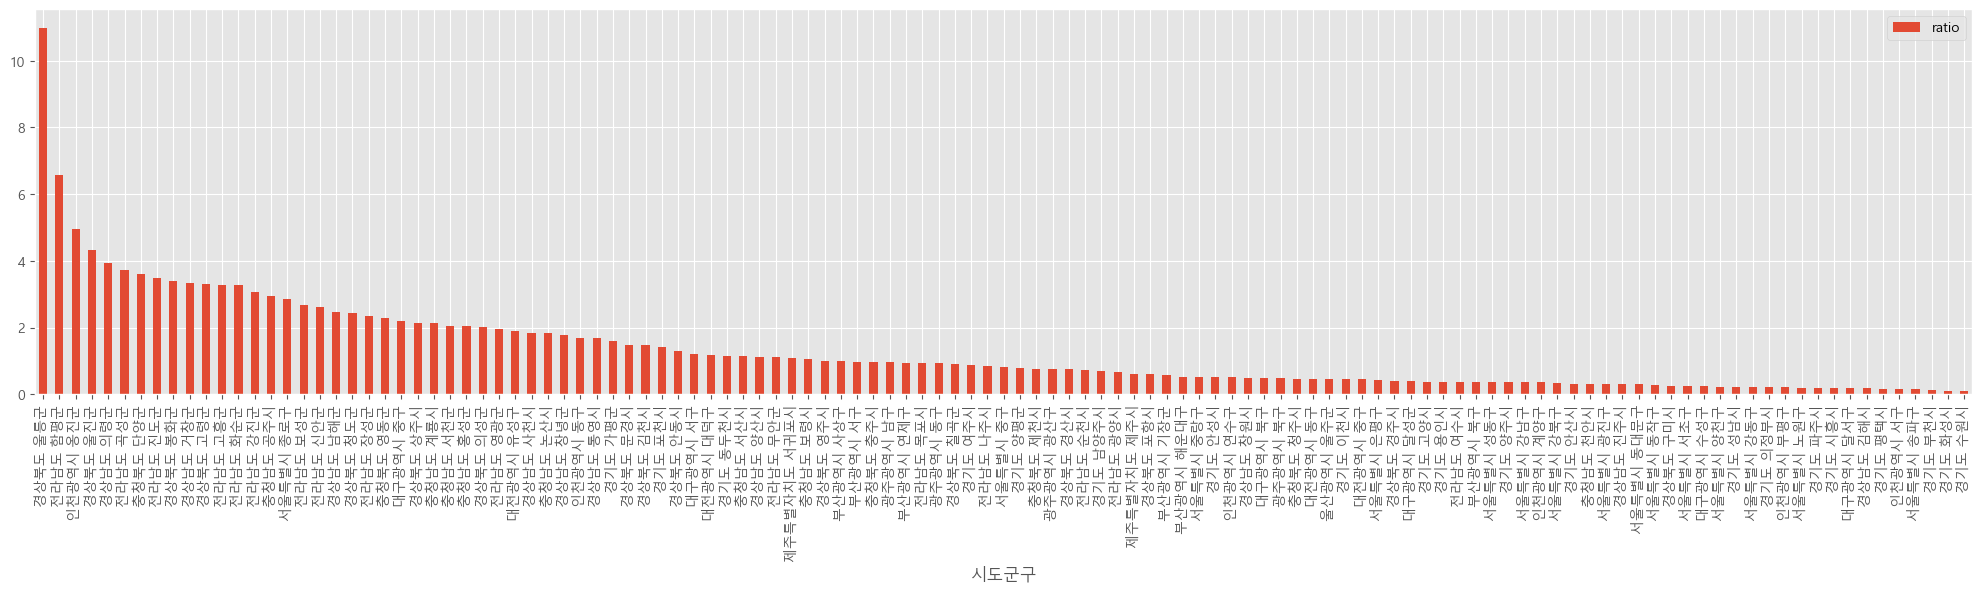

In [91]:
MC_ratio = local_ppl[['ratio']]
MC_ratio = MC_ratio.sort_values('ratio', ascending = False)  #'ratio' 칼럼을 기준으로 내림차순
plt.rcParams['figure.figsize']=(25,5)
MC_ratio.plot(kind='bar',rot=90)
plt.savefig('E:/0401/빅데이터분석/week11/ratio_bar.png')  #사진 저장할 때는 show()보다 먼저 코드 작성하기
plt.show()